In [192]:
# read in all the packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [124]:
#Read in the data
data=pd.read_csv('crypto_data.csv')
crypto=pd.DataFrame(data)
data.columns

Index(['Unnamed: 0', 'CoinName', 'Algorithm', 'IsTrading', 'ProofType',
       'TotalCoinsMined', 'TotalCoinSupply'],
      dtype='object')

In [112]:
#
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the `IsTrading` column from the dataframe.
crypto_trading=data.loc[data['IsTrading']==True]
crypto_trading

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [113]:
#* Remove all rows that have at least one null value.
Crypto_non_null=crypto_trading.dropna()
Crypto_non_null

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [155]:
#* Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
istraded=Crypto_non_null[(Crypto_non_null['TotalCoinsMined'].astype(float)>0)]
istraded.columns
number_only=istraded.drop(['CoinName','IsTrading','Unnamed: 0'],axis=1)


In [158]:
# number_only=istraded[istraded['Unnamed: 0', 'Algorithm', 'IsTrading', 'ProofType',
#        'TotalCoinsMined', 'TotalCoinSupply']]
# X_normal=pd.to_numeric(istraded,errors="coerce")
number_dummie=pd.get_dummies(number_only, columns=['Algorithm','ProofType'])
print(number_dummie.info())




<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 98 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    object 
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorit

In [170]:
scaler=StandardScaler()
data_scale=scaler.fit_transform(number_dummie)
data_scale

C:\Users\joelw\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\joelw\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [179]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA(n_components=.95)
model=pca.fit_transform(data_scale)
pca_data=pd.DataFrame(model)
pca_data.shape

(532, 79)

In [190]:
tsne = TSNE(learning_rate=30)
tsne_features = tsne.fit_transform(pca_data)
tsne_features_df=pd.DataFrame(tsne_features)
tsne_features_df

,0,1
0,-12.927702,3.157808
1,-11.550113,9.601128
2,-21.669037,14.269385
3,-27.186234,-11.332119
4,16.182953,8.798273
...,...,...
527,-22.797388,-8.038881
528,-14.876665,8.732237
529,11.739112,20.188351
530,8.091448,12.081044


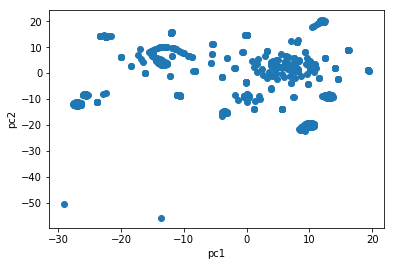

In [191]:

plt.scatter(tsne_features_df.iloc[:,0],tsne_features_df.iloc[:,1],cmap="Set1",)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()



In [193]:
#Kmeans anlysis
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,151370.920260
1,2,80588.746137
2,3,51256.712419
3,4,33542.629883
4,5,26966.654430


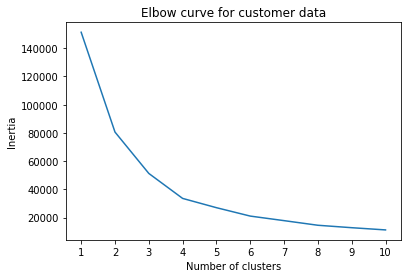

In [194]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [ ]:
#Based on the elbow curve 4 clusters would seem optimum.  This is basely on reducing the data with pca and t-sne.  Future reccomendations would be to compare pcs fit to the kmeans alone.